## Part 1: Implementation
Implement Multi-Dimensional Scaling

In [20]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import numpy as np


def centering(n):
    I = np.identity(n)
    O = np.ones((n, n))
    return I - O/n

def double_centering(D):
    n, n = D.shape
    J = centering(n)
    return (-1/2)*J*D*J

def eig_top(B, n):
    w, v = np.linalg.eig(B)
    i = np.argsort(w)[::-1]
    w, v = w[i].real, v[:,i].real
    return w[:n], v[:,:n]

"""Args:
X: input samples, array (num, dim)
n_components: dimension of output data

Returns:
Y: output samples, array (num, n_components)
"""
def MDS(X, n_components=2):
    D = squareform(pdist(X) ** 2)
    B = double_centering(D)
    w, E = eig_top(B, n_components)
    A = np.diag(np.sqrt(np.abs(w)))
    Y = E.dot(A)
    return Y


## Part 2: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS.

In [21]:
from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

<IPython.core.display.Javascript object>


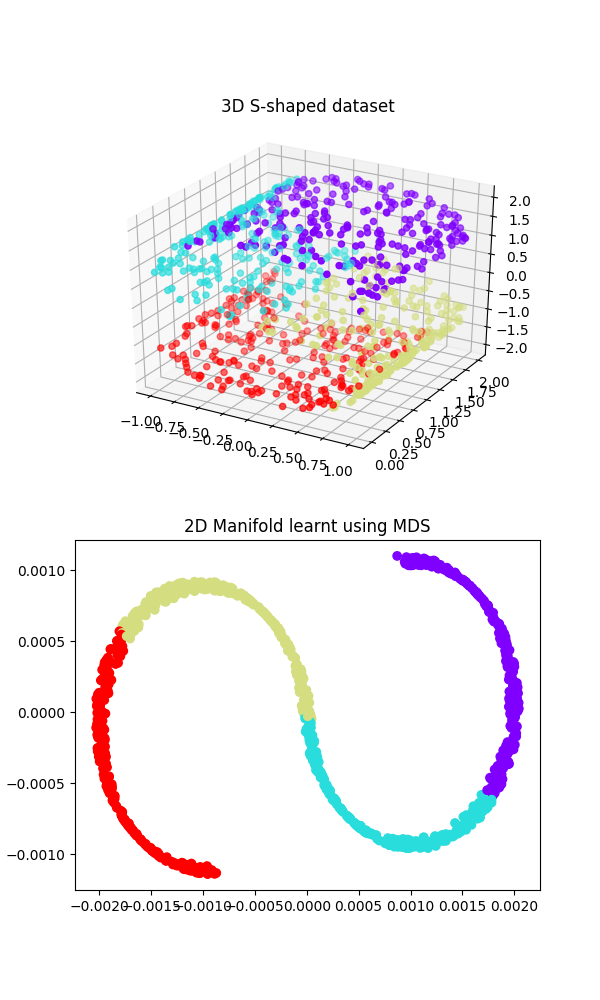

In [29]:
#  Visualization code here
from matplotlib import pyplot as plt
%matplotlib notebook

MX = MDS(SX, 2)

fig = plt.figure(figsize=(6, 10))
axi = fig.add_subplot(211, projection='3d')
colorize = dict(c=St, cmap=plt.cm.get_cmap('rainbow', 4))
axi.scatter3D(SX[:, 0], SX[:, 1], SX[:, 2], **colorize)
axi.title.set_text('3D S-shaped dataset')

axi = fig.add_subplot(212)
axi.scatter([MX[:, 0]], [MX[:, 1]], **colorize)
axi.title.set_text('2D Manifold learnt using MDS')


## Part 2: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using MDS.

In [27]:
# Swiss roll dataset loading here
import numpy


d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


The code in the next cell should draw a single plot with the following subplots:
1. Visualize Swiss roll.
2. Unwrap the manifold in 2D and visualize using MDS.


<IPython.core.display.Javascript object>


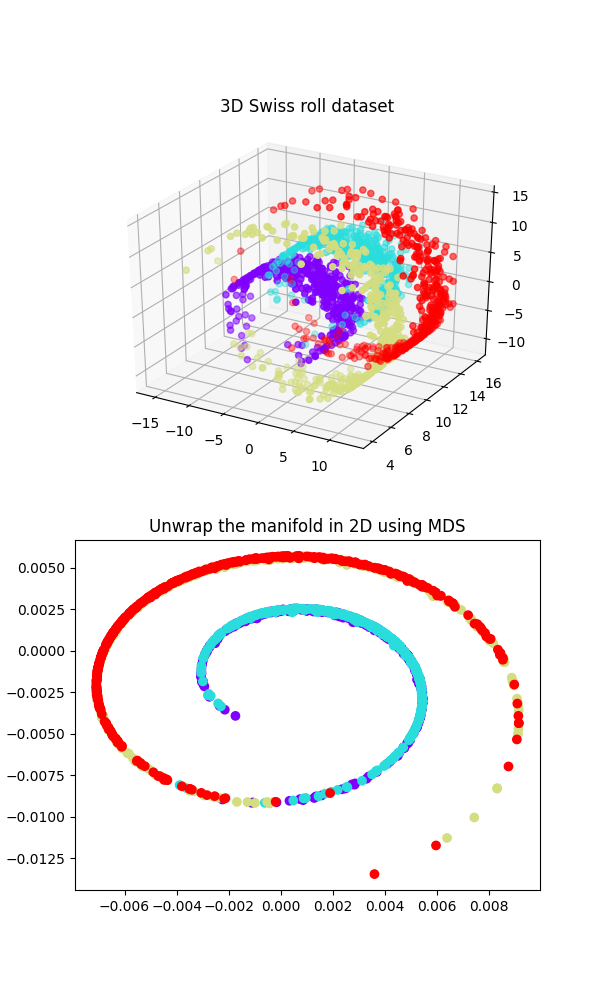

In [28]:
import numpy    as np
from matplotlib import pyplot as plt
%matplotlib notebook


X  = swissroll
Xc = np.linspace(0, 1, X.shape[0])
MX = MDS(X, 10)

fig = plt.figure(figsize=(6, 10))
axi = fig.add_subplot(211, projection='3d')
colorize = dict(c=Xc, cmap=plt.cm.get_cmap('rainbow', 4))
axi.scatter3D(X[:, 0], X[:, 1], X[:, 2], **colorize)
axi.title.set_text('3D Swiss roll dataset')

axi = fig.add_subplot(212)
axi.scatter(MX[:, 0], MX[:, 1], **colorize)
axi.title.set_text('Unwrap the manifold in 2D using MDS')